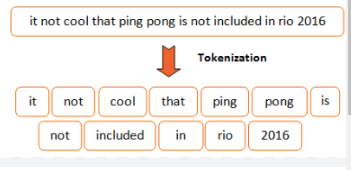

In [1]:
import spacy

C:\Users\Comuter Solution\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


In [3]:
token = doc[1]
token.text

'Strange'

In [4]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [5]:
type(nlp)

spacy.lang.en.English

In [6]:
type(doc)

spacy.tokens.doc.Doc

In [7]:
#"Span" object represents a slice of a Doc (document)
span = doc[0:5]
span

Dr. Strange loves pav bhaji

In [8]:
type(span)

spacy.tokens.span.Span

In [9]:
#Token attributes are pieces of information associated with individual tokens within a text document.
doc = nlp("Tony gave two $ to Peter.")

In [10]:
token0 = doc[0]
token0

Tony

In [11]:
token0.is_alpha

True

In [12]:
token0.like_num

False

In [14]:
token3 = doc[3]
token3

$

In [15]:
token3.is_currency

True

In [16]:
for token in doc:
    print(token, "==>", "index: ", token.i, "is_alpha:", token.is_alpha, 
          "is_punct:", token.is_punct, 
          "like_num:", token.like_num,
          "is_currency:", token.is_currency,
         )

Tony ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index:  2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index:  3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  6 is_alpha: False is_punct: True like_num: False is_currency: False


In [17]:
#Customizing tokenizer

In [18]:
from spacy.symbols import ORTH

nlp = spacy.blank("en")
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [19]:
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [20]:
nlp.add_pipe('sentencizer')

In [21]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [22]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [23]:
doc = nlp(text)
data_websites = [token.text for token in doc if token.like_url ] 
data_websites

['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

In [24]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

In [25]:
doc = nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text, doc[token.i+1].text)  

two $
500 €


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
sentence = ['আমি ভালবাসি বই পড়তে']
tokenizer = Tokenizer(num_words = 10,filters='!')

In [27]:
tokenizer.fit_on_texts(sentence)
word_index = tokenizer.word_index
print(word_index)

{'আমি': 1, 'ভালবাসি': 2, 'বই': 3, 'পড়তে': 4}
